<a href="https://colab.research.google.com/github/arulbenjaminchandru/Python-and-Gen-AI/blob/main/RAG_with_LLAMA3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00


In [3]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 15.2 MB/s eta 0:00:00


In [4]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.4 MB/s eta 0:00:00


In [5]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 18.9 MB/s eta 0:00:00


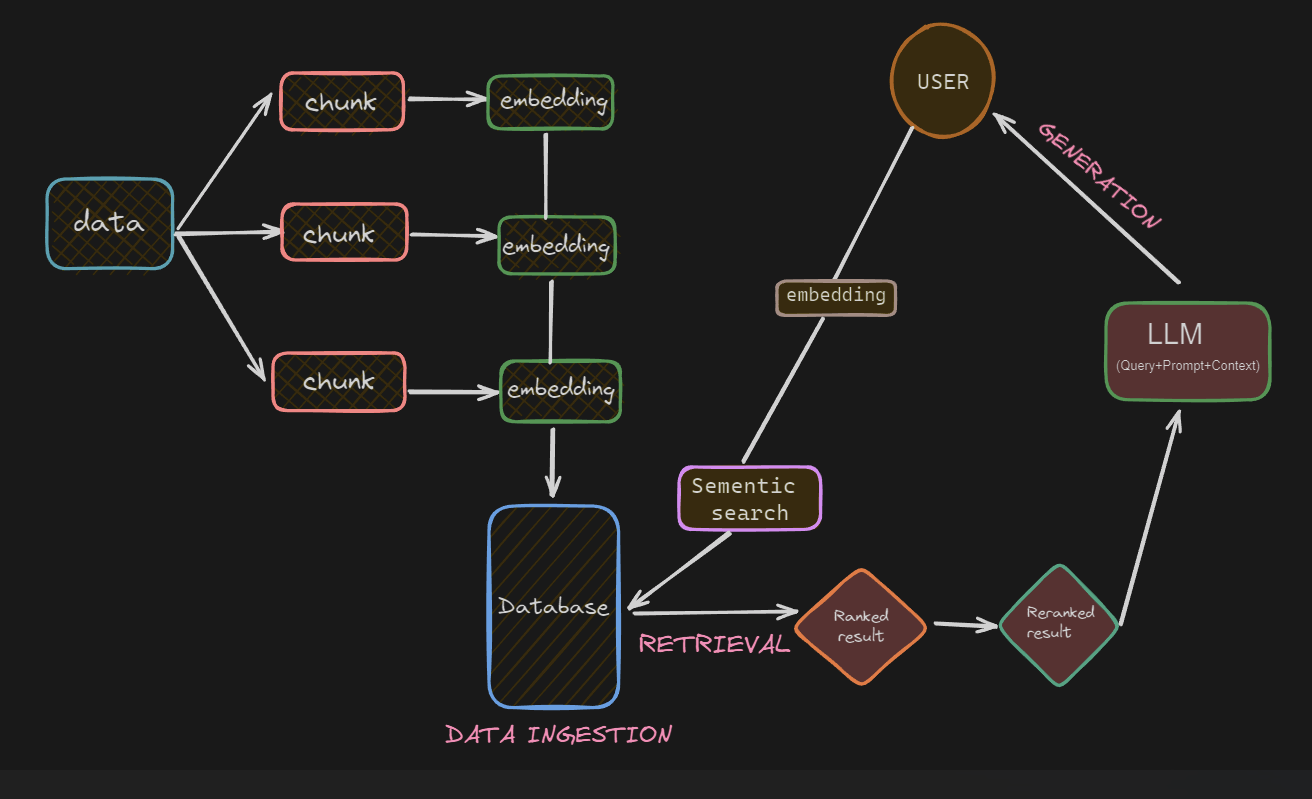

image.png

# RAG Having Three main Stages

1. Data Ingestion
2. Data Retrieval
3. Data Generation

In [6]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA

In [17]:
# Load document using PyPDFLoader document loader
loader = PyPDFLoader("/content/constitution_of_india.pdf")
documents = loader.load()

In [18]:
#Splitting the data into chunk
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
docs = text_splitter.split_documents(documents=documents)

print(docs)

[Document(metadata={'source': '/content/constitution_of_india.pdf', 'page': 0}, page_content='THE CONSTITUTION OF INDIA\nWE, THE PEOPLE OF INDIA, having solemnly\nresolved to constitute India into a 1[SOVEREIGN\nSOCIALIST SECULAR DEMOCRATIC REPUBLIC] andto secure to all its citizens:\nJUSTICE, social, economic and political;\nLIBERTY of thought, expression, belief, faith and\nworship;\nEQUALITY of status and of opportunity;\nand to promote among them all\nFRATERNITY assuring the dignity of the individual\nand the \n2[unity and integrity of the Nation];\nIN OUR CONSTITUENT ASSEMBLY this twenty-\nsixth day of Novembe r, 1949, do HEREBY ADOPT,\nENACT AND GIVE TO OURSELVES THISCONSTITUTION.\n1Subs. by the Constitution (Forty-second Amendment) Act, 1976, s. 2, for “SOVEREIGN\nDEMOCRATIC REPUBLIC” (w.e.f. 3-1-1977).\n2Subs. by s. 2, ibid., for “unity of the Nation” (w.e.f. 3-1-1977).Preamble.'), Document(metadata={'source': '/content/constitution_of_india.pdf', 'page': 1}, page_content='PART

# MTEB: Massive Text Embedding Benchmark

#### The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

BGE(BAAI general embedding)
BAAI: https://huggingface.co/BAAI

**Dataset size:**  Larger datasets generally benefit from more powerful models like MPNet.

**Computational resources:**  If you have limited resources, BGE Small En or MiniLM might be better options.

**Task complexity:**  For complex tasks like question answering or text summarization, MPNet is often preferred.

**Embedding dimensionality:**  Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

**Performance vs. efficiency trade-off:** Decide if you prioritize high accuracy or faster processing

#####Experimentation is key. Try different models and evaluate their performance on your specific task and dataset to find the best fit.

MPNET: Masked and Permuted Pre-training for Language Understanding.

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb


In [19]:
#loading the embedding model from huggingface
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)

# Why Use FAISS

1. Efficiency
2. Versatility
3. Scalability
4. Integration
5. GPU Support

# Security Considerations

1. Data Control
2. Reduced Exposure
3. Compliance
4. Latency and Performance
5. Network Security

In [20]:
'''
from langchain.vectorstores import FAISS
vectorstore=FAISS.from_documents(text_chunks, embeddings)
retriever=vectorstore.as_retriever()
'''

'\nfrom langchain.vectorstores import FAISS\nvectorstore=FAISS.from_documents(text_chunks, embeddings)\nretriever=vectorstore.as_retriever()\n'

In [21]:
#loading the data and correspond embedding into the FAISS
vectorstore = FAISS.from_documents(docs, embeddings)

In [22]:
# Persist the vectors locally on disk
vectorstore.save_local("faiss_index_")

In [23]:
# Load from local storage
persisted_vectorstore = FAISS.load_local("faiss_index_", embeddings,allow_dangerous_deserialization=True)

In [24]:
#creating a retriever on top of database
retriever = persisted_vectorstore.as_retriever()

In [25]:
!pip install langchain_ollama

In [26]:
#loading the llama3.1 model using Ollama
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 8.9 MB/s eta 0:00:00


curl -fsSL https://ollama.com/install.sh | sh

ollama serve & ollama pull llama3.1

In [38]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [39]:
from langchain_community.llms import Ollama

In [40]:
# Initialize an instance of the Ollama model
llm = Ollama(model="llama3.1")

In [41]:
# Invoke the model to generate responses
response = llm.invoke("What is Article 15?")
print(response)

Article 15 can refer to different things depending on the context. Here are a few possible interpretations:

1. **Indian Constitution**: In India, Article 15 of the Constitution prohibits the State from discriminating against any citizen on grounds such as religion, race, caste, sex, or place of birth. It also empowers the State to make special provisions for women and children.

2. **International law**: The International Covenant on Civil and Political Rights (ICCPR), a human rights treaty adopted by the United Nations General Assembly in 1966, has an Article 15 that relates to freedom from arbitrary arrest or detention. According to this article, no one shall be arbitrarily arrested or detained.

3. **Other contexts**: In other contexts, such as legislation or regulations, "Article 15" might refer to a specific provision within a legal document that deals with various aspects of the law, including employment law in some countries.

Without more context, it's difficult to provide a p

In [42]:
'''from langchain_ollama.llms import OllamaLLM
#loading the ollama model
model = OllamaLLM(model="llama3.1")'''

'from langchain_ollama.llms import OllamaLLM\n#loading the ollama model\nmodel = OllamaLLM(model="llama3.1")'

In [43]:
 #Use RetrievalQA chain for orchestration
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

In [44]:
while True:
  query = input("Type your query if you want to exit type Exit: \n")
  if query == "Exit":
    break
  result = qa.run(query)
  print(result)

Type your query if you want to exit type Exit: 
What is Article 15?
There doesn't appear to be an Article 15 in the provided context. The text seems to contain Articles and sections related to constitutional provisions, but it does not mention Article 15 specifically.

If you could provide more information or clarify which article you are referring to, I'll do my best to help.


KeyboardInterrupt: Interrupted by user